<a href="https://colab.research.google.com/github/Cpl-FilipePereira/Cpl-FilipePereira/blob/main/Trabalho_Final_M%C3%B3dulo_2-parte_pessoal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2 Final Activity

Starting from 99 patient sample of Subjective Cognitive Decline database, I will develop a Machine Learning algorythm capable of identifing patients at risk of conversion to mild cognitive impairment or Alzheimer Disease.

In this database there are resulst from two measure instruments, MMSE (Mini-Mental State Examination) that scores from 0 up to 30 points eight areas of mental performance (being 0 the major risk of mental impairness); and GDS (Geriatric Deprtession Scale) that score up to 30 point th risk of depression (being 30 the highest risk).

## Phase 0: Import file, load libraries, rename file, visualization of data and rename variables for easier visualization

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DATASET (final activity of module 2).xlsx to DATASET (final activity of module 2) (1).xlsx


In [ ]:
DATASET = "DATASET (final activity of module 2).xlsx"

In [ ]:
#Load needed libraries
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import style
plt.style.use("ggplot")
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import RobustScaler


In [ ]:
#File Import

df = pd.read_excel(DATASET)
df.head()

,ID,Conversion,Age,Gender,Education,HTA,DLP,Smoker,Antidepressants,MMSE,GDS
0,1,1,73,1,2,1,1,1,0,29,5
1,2,0,74,1,2,1,1,0,0,25,21
2,3,0,77,0,3,1,0,0,0,27,13
3,4,0,53,0,3,1,1,0,0,30,5
4,5,0,60,0,2,0,1,2,0,29,14


In [ ]:
df.columns #identification of our columns, each one a variable

Index(['ID', 'Conversion', 'Age', 'Gender', 'Education', 'HTA', 'DLP',
       'Smoker', 'Antidepressants', 'MMSE', 'GDS'],
      dtype='object')

In [ ]:
df = df.drop(columns=["ID"]) #Elimination of identification column, to not confuse the algorythm

In [ ]:
df.dtypes #Confirmation the elimination of "ID" column and check the data types

Conversion         int64
Age                int64
Gender             int64
Education          int64
HTA                int64
DLP                int64
Smoker             int64
Antidepressants    int64
MMSE               int64
GDS                int64
dtype: object

In [ ]:
#As we can see, there's numerical variables and categorical variables, all written in numbers. I will reclassify and confirm the change.

for col in df.iloc[:, [0,2,3,4,5,6,7]]:
    df[col] = df[col].astype("category")

for col in df.iloc[:, [1,8,9]]:
    df[col] = df[col].astype("float64")

df.dtypes

Conversion         category
Age                 float64
Gender             category
Education          category
HTA                category
DLP                category
Smoker             category
Antidepressants    category
MMSE                float64
GDS                 float64
dtype: object

In [ ]:
#Rename for easier visualization, not essencial to work but keeps grids more tidy.
df.rename(columns={"Education":"Educ",
                   "Antidepressants":"Antidep",
                   }, inplace = True)
df.head()

,Conversion,Age,Gender,Educ,HTA,DLP,Smoker,Antidep,MMSE,GDS
0,1,73.0,1,2,1,1,1,0,29.0,5.0
1,0,74.0,1,2,1,1,0,0,25.0,21.0
2,0,77.0,0,3,1,0,0,0,27.0,13.0
3,0,53.0,0,3,1,1,0,0,30.0,5.0
4,0,60.0,0,2,0,1,2,0,29.0,14.0


In [ ]:
#Check for null data
df.isnull().sum()

Conversion    0
Age           0
Gender        0
Educ          0
HTA           0
DLP           0
Smoker        0
Antidep       0
MMSE          0
GDS           0
dtype: int64

In [ ]:
df.shape #Check for how many lines (cases) and columns (variables) the algorythm as to deal with.

(99, 10)

As far , I only arrange the data so it will be ready and set to work.

    There are a total of 10 variables, 3 numerical and 7 categorical.

    There are 99 cases to study.

    There are no miss values.

    All presumed libraries were loaded.



## Phase 1: Statistical Analysis of the database

    Every variable will be evaluted descriptively

,count,unique,top,freq
Conversion,99,2,0,67


0    67
1    32
Name: Conversion, dtype: int64
There's a higher prevalence of conversion cases


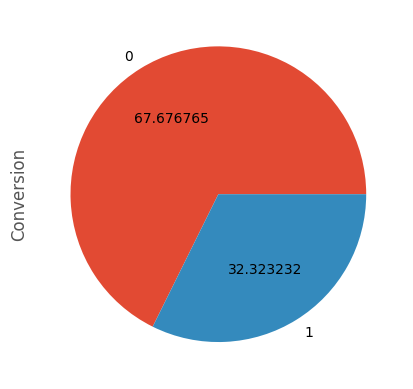

In [ ]:
display(df[["Conversion"]].describe().T) # Alternatively "describe_Conversion = df["Conversion"].describe()"

value_counts_Conversion = df["Conversion"].value_counts()
print(value_counts_Conversion)


df["Conversion"].value_counts().plot.pie(autopct="%2f") #Where 0 is No, 1 is Yes
if df["Conversion"].value_counts== 0 > df["Conversion"].value_count==1:
  print("There's a higher prevalence of non-conversion cases")
else: #As there are a uneven number of cases, there will never be a equal number of cases situation
  print("There's a higher prevalence of conversion cases")

In [ ]:
display(df[["Age"]].describe().T)


freq = df["Age"].value_counts()
age, freq = zip(*freq.items())
plt.bar(age, freq)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Frequency Table - Age")
plt.show()

from scipy import stats
import numpy as np

Age_dados =df["Age"]
statistic_Age, p_value_Age = stats.shapiro(Age_dados)
p_value_Age_round = round(p_value_Age, 4)
print("Statistic:", statistic_Age)
print("P Value:", p_value_Age)
print("P Value Round:", p_value_Age_round)
alpha = 0.05
if p_value_Age > alpha:
  print("Age has a normal distribution according to Shapiro-Wilk test")
else:
  print("Age doesn't have a normal distribuition according to Shapiro-Wilk test")

,count,mean,std,min,25%,50%,75%,max
Age,99.0,66.888889,8.12013,47.0,62.0,68.0,72.5,85.0


AttributeError: ignored

,count,mean,std,min,25%,50%,75%,max
Gender,99.0,0.484848,0.502314,0.0,0.0,0.0,1.0,1.0


0    51
1    48
Name: Gender, dtype: int64


<Axes: >

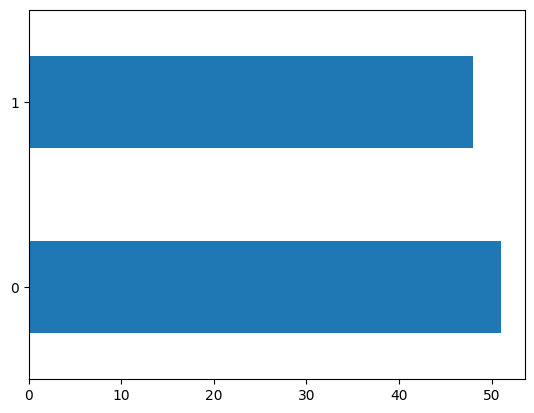

In [ ]:
display(df[["Gender"]].describe().T)
value_counts_Gender = df["Gender"].value_counts()

print(value_counts_Gender)

df["Gender"].value_counts()[:20].plot(kind="barh") #Where 0 is , 1 is

,count,mean,std,min,25%,50%,75%,max
Educ,99.0,2.080808,0.954867,1.0,1.0,2.0,3.0,4.0


3    43
1    39
2    15
4     2
Name: Educ, dtype: int64


<Axes: >

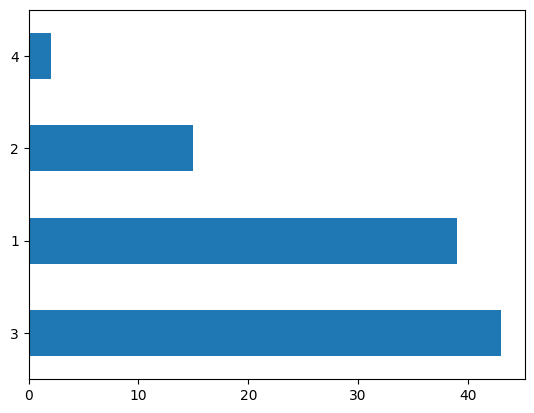

In [ ]:
display(df[["Educ"]].describe().T)
value_counts_Educ = df["Educ"].value_counts()

print(value_counts_Educ)

df["Educ"].value_counts()[:20].plot(kind="barh") #Where 1 is no education/ primary school, 2 is pre-professional /pre-university, 3 is higher professional/universitary and 4 is PhD

,count,mean,std,min,25%,50%,75%,max
HTA,99.0,0.505051,0.502519,0.0,0.0,1.0,1.0,1.0


1    50
0    49
Name: HTA, dtype: int64


<Axes: >

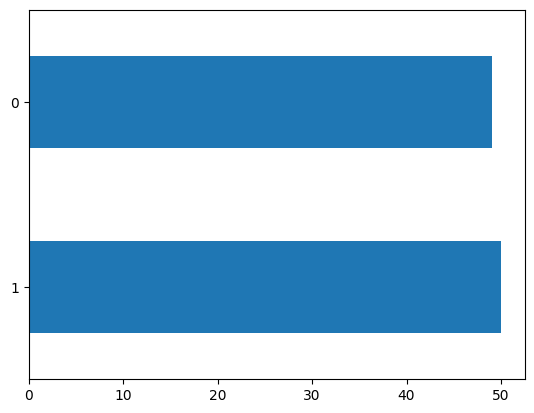

In [ ]:
display(df[["HTA"]].describe().T)
value_counts_HTA = df["HTA"].value_counts()

print(value_counts_HTA)

df["HTA"].value_counts()[:20].plot(kind="barh") #Where 0 is No, 1 is Yes

,count,mean,std,min,25%,50%,75%,max
DLP,99.0,0.626263,0.486257,0.0,0.0,1.0,1.0,1.0


1    62
0    37
Name: DLP, dtype: int64


<Axes: >

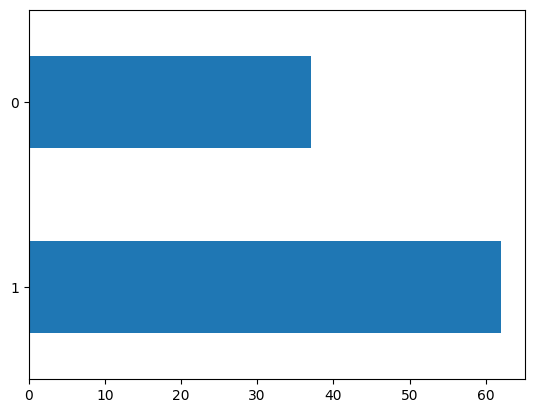

In [ ]:
display(df[["DLP"]].describe().T)
value_counts_DLP = df["DLP"].value_counts()

print(value_counts_DLP)

df["DLP"].value_counts()[:20].plot(kind="barh") #Where 0 is No, 1 is Yes

,count,mean,std,min,25%,50%,75%,max
Smoker,99.0,0.494949,0.825286,0.0,0.0,0.0,1.0,2.0


0    71
2    21
1     7
Name: Smoker, dtype: int64


<Axes: >

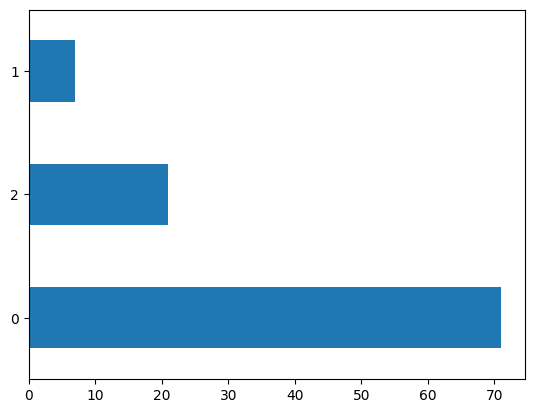

In [ ]:
display(df[["Smoker"]].describe().T)
value_counts_Smoker = df["Smoker"].value_counts()

print(value_counts_Smoker)

df["Smoker"].value_counts()[:20].plot(kind="barh") #Where 0 is No, 1 is Yes, 2 is Quitted

,count,mean,std,min,25%,50%,75%,max
Antidep,99.0,0.30303,0.461907,0.0,0.0,0.0,1.0,1.0


0    69
1    30
Name: Antidep, dtype: int64


<Axes: >

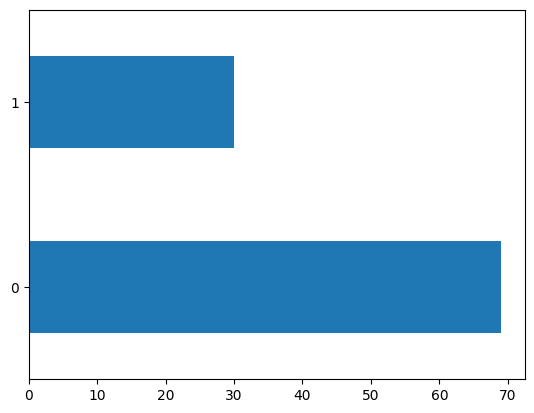

In [ ]:
display(df[["Antidep"]].describe().T)
value_counts_Antidep = df["Antidep"].value_counts()

print(value_counts_Antidep)

df["Antidep"].value_counts()[:20].plot(kind="barh") #Where 0 is No, 1 is Yes

,count,mean,std,min,25%,50%,75%,max
MMSE,99.0,28.313131,1.688173,20.0,28.0,29.0,29.0,30.0


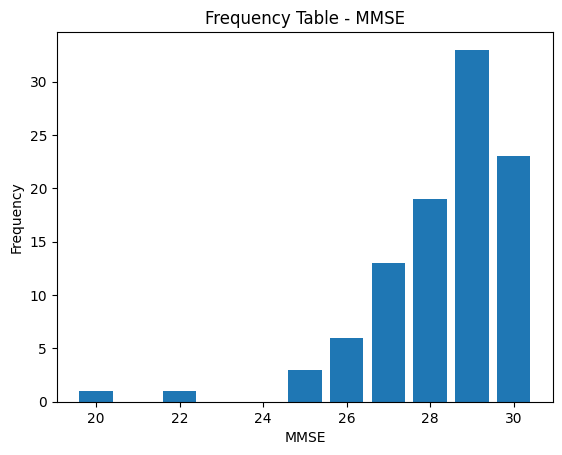

Statistic: 0.8064033389091492
P Value 4.492867744509965e-10
P Value round 0.0
MMSE doesn't have a normal distribuition according to Shapiro-Wilk test


In [ ]:
display(df[["MMSE"]].describe().T)

freq = df["MMSE"].value_counts()
MMSE, freq = zip(*freq.items())
plt.bar(MMSE, freq)
plt.xlabel("MMSE")
plt.ylabel("Frequency")
plt.title("Frequency Table - MMSE")
plt.show() #Where higher scores represent better performance on the MMSE test

MMSE_dados =df["MMSE"]
statistic_MMSE, p_value_MMSE = stats.shapiro(MMSE_dados)
p_value_MMSE_round = round(p_value_MMSE, 4)
print("Statistic:", statistic_MMSE)
print("P Value", p_value_MMSE)
print("P Value round", p_value_MMSE_round)

if p_value_MMSE > alpha:
  print("MMSE has a normal distribution according to Shapiro-Wilk test")
else:
  print("MMSE doesn't have a normal distribuition according to Shapiro-Wilk test")

,count,mean,std,min,25%,50%,75%,max
GDS,99.0,9.474747,6.417997,0.0,5.0,8.0,13.5,30.0


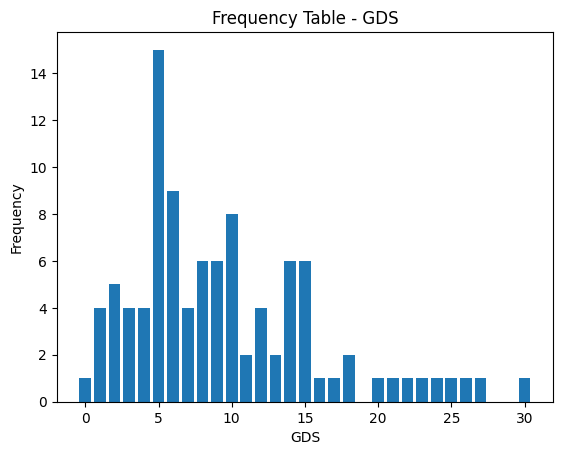

Statistic: 0.9151747822761536
P Value: 8.66022764967056e-06
P Value round: 0.0
GDS doesn't have a normal distribuition according to Shapiro-Wilk test


In [ ]:
display(df[["GDS"]].describe().T)

freq = df["GDS"].value_counts()
GDS, freq = zip(*freq.items())
plt.bar(GDS, freq)
plt.xlabel("GDS")
plt.ylabel("Frequency")
plt.title("Frequency Table - GDS")
plt.show() #where lower scores represent higher degree of depression

GDS_dados =df["GDS"]
statistic_GDS, p_value_GDS = stats.shapiro(GDS_dados)
p_value_GDS_round = round(p_value_GDS, 4)
print("Statistic:", statistic_GDS)
print("P Value:", p_value_GDS)
print("P Value round:", p_value_GDS_round)
alpha = 0.05
if p_value_GDS > alpha:
  print("GDS has a normal distribution according to Shapiro-Wilk test")
else:
  print("GDS doesn't have a normal distribuition according to Shapiro-Wilk test")

## Phase 2: Balancing the Data

Due to our target key ("Conversion") doesn´t have equal values, it's crucial to balance the data either by undersizing (reducing the non-conversion cases, equaling the 32 converted cases) or by overscaling data (incressing to 67 the number of non-converted cases). After balancing I will chose the method more with better performance.

In [ ]:
df_tgt = df["Conversion"]
df_tgt.head() #Defining target key and checking it out

0    1
1    0
2    0
3    0
4    0
Name: Conversion, dtype: int64

In [ ]:
df_ftrs = df[df.columns[1:]]
df_ftrs.head() #Defining feature keys and checking them out

,Age,Gender,Educ,HTA,DLP,Smoker,Antidep,MMSE,GDS
0,73,1,2,1,1,1,0,29,5
1,74,1,2,1,1,0,0,25,21
2,77,0,3,1,0,0,0,27,13
3,53,0,3,1,1,0,0,30,5
4,60,0,2,0,1,2,0,29,14


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(class_weight="balanced")


RandomForestClassifier(class_weight='balanced')

In [ ]:
c_class0 = np.where(["Conversion"]==0)[0]
c_class1 = np.where(["Conversion"]==1)[0]
n_class0 = len(c_class0)
n_class1 = len(c_class1)
i_class0_downsampled = np.random.choice(c_class0, size=n_class1, replace= False)



0    32
1    32
Name: Conversion, dtype: int64

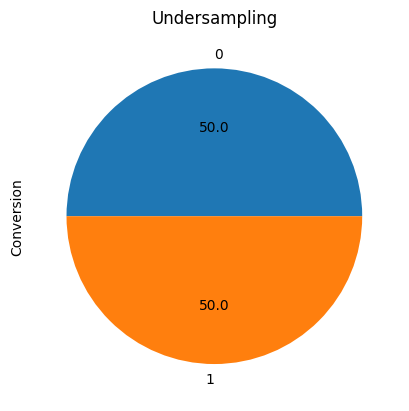

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
y = df["Conversion"]
X_res, y_res = rus.fit_resample(X,y)
ax = y_res.value_counts().plot.pie(autopct= "%.1f")
_ = ax.set_title("Undersampling")
y_res.value_counts()

1    67
0    67
Name: Conversion, dtype: int64

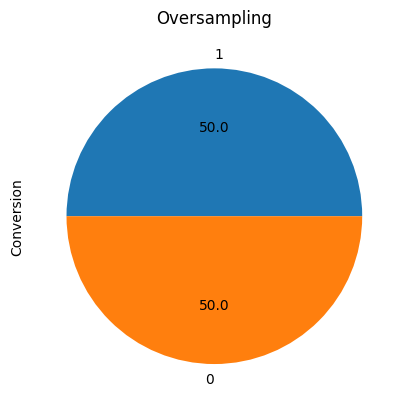

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy= "not majority")
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct="%.1f")
_ = ax.set_title("Oversampling")
y_res.value_counts()

## Phase 3: Creating a Machine Learning model, with Randon Forest

## Phase 4: Definition of hyperparameters

## Phase 5: Determination of most important variables

## Phase 6: Elaboration of the Confusion Matrix

## Phase 7: Elaboration of the Reciver Operator Curve

## Phase 8: Presentation of the results

